In [72]:
# Initialize the notebook
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(17)

In [77]:
# Load images and create label vector
root_path = "./Dataset/"
images_path = root_path + "gaussian_filtered_images/gaussian_filtered_images/"
images = [] # images
Y = [] # label vector

dir_names = [dir_name for dir_name in os.listdir(images_path) if os.path.isdir(images_path + dir_name)]
for dir_name in dir_names:
    if dir_name == "No_DR": # Create a label
        y = 0 
    elif dir_name == 'Mild':
        y = 1
    elif dir_name == 'Moderate':
        y=2
    elif dir_name == "Severe":
        y=3
    else:
        y=4
    for file_name in os.listdir(images_path + dir_name):
        images.append(plt.imread(images_path + dir_name + "/" + file_name))
        Y.append(y)
    print("Finish reading " + dir_name + " condition images.")
    print("Total image read: " + str(len(images)))
print("End of the data")
Y = np.reshape(np.array(Y), (1, -1)) # Make Y to be a row vector

Finish reading No_DR condition images.
Total image read: 1805
Finish reading Mild condition images.
Total image read: 2175
Finish reading Proliferate_DR condition images.
Total image read: 2470
Finish reading Severe condition images.
Total image read: 2663
Finish reading Moderate condition images.
Total image read: 3662
End of the data


Size of each image: (224, 224, 3)
Size of labels: (1, 3662)
{0: 1805, 1: 370, 2: 999, 3: 193, 4: 295}


<ipython-input-78-2246792e2950>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


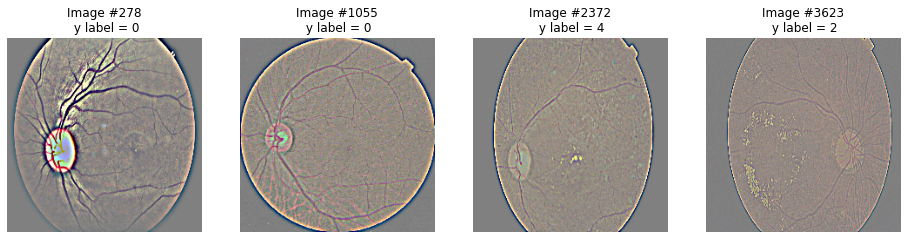

In [78]:
# Print some detail
print("Size of each image: " + str(images[0].shape))
print("Size of labels: " + str(Y.shape))
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

# Randomly show images
n = 4 # show 4 images
fig, axes = plt.subplots(nrows = 1, ncols = n, figsize=(16, 16))
rand_idx = np.random.randint(0, len(images), n)
for i in range(n):
    axes[i].imshow(images[rand_idx[i]])
    axes[i].title.set_text("Image #" + str(rand_idx[i]) + "\n y label = " + str(Y[0][rand_idx[i]]))
    axes[i].axis("off")
fig.show()

Size of each grayscale image: (224, 224)


<ipython-input-79-03aa365fbcd0>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


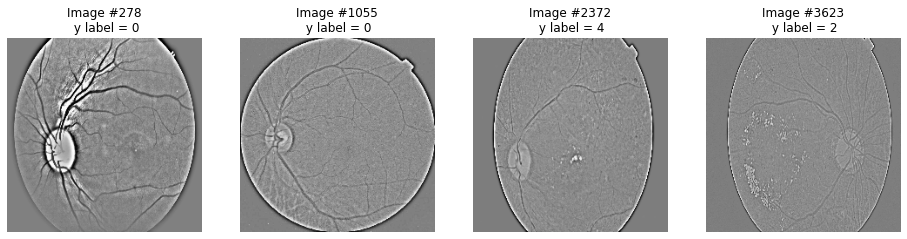

In [79]:
def rgb_to_gray(image):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    return np.dot(image, rgb_weights)

gray_images = list(map(rgb_to_gray, images)) # Convert RGB images to grayscale images

# Print the image size
print("Size of each grayscale image: " + str(gray_images[0].shape))

# Show grayscale images
fig, axes = plt.subplots(nrows = 1, ncols = n, figsize=(16, 16))
for i in range(n):
    axes[i].imshow(gray_images[rand_idx[i]], cmap='gray')
    axes[i].title.set_text("Image #" + str(rand_idx[i]) + "\n y label = " + str(Y[0][rand_idx[i]]))
    axes[i].axis("off")
fig.show()

In [80]:
X = np.array(gray_images).reshape(len(gray_images), -1).T # flatten and reshape
print("Size of data set (n_x, m): " + str(X.shape))
print("Size of label (1, m): " + str(Y.shape))

Size of data set (n_x, m): (50176, 3662)
Size of label (1, m): (1, 3662)


In [81]:
# Split the data to train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size = 0.25, random_state = 5)

In [82]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2746, 50176), (916, 50176), (2746, 1), (916, 1))

In [83]:
from sklearn import svm

In [84]:
clf = svm.SVC(decision_function_shape='ovo')

In [85]:
clf.fit(X_train, Y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
score = clf.score(X_test, Y_test)

Score:  0.7314410480349345


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       433
           1       0.37      0.35      0.36        94
           2       0.60      0.81      0.69       278
           3       0.56      0.11      0.18        46
           4       0.67      0.03      0.06        65

    accuracy                           0.73       916
   macro avg       0.62      0.45      0.44       916
weighted avg       0.73      0.73      0.70       916



In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[406,   3,  24,   0,   0],
       [  7,  33,  53,   1,   0],
       [ 21,  31, 224,   1,   1],
       [  6,   9,  26,   5,   0],
       [  3,  13,  45,   2,   2]])

In [88]:
import pickle

In [89]:
pickle.dump(clf, open('model2.pkl', 'wb'))

In [109]:
model = pickle.load(open('model2.pkl','rb'))

In [91]:
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
model.predict(X_test[10].reshape(1,-1))

array([0])

In [93]:
Y_test[10]

array([0])

In [26]:
from PIL import Image

In [27]:
img = Image.open('Dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png')

In [29]:
img2 = plt.imread('Dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png')

In [31]:
x = np.array(img)

In [37]:
x.max()

255

In [45]:
img2

array([[[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        ...,
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.50980395, 0.5176471 , 0.5058824 ],
        [0.5019608 , 0.5019608 , 0.5019608 ]],

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        ...,
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5058824 , 0.5137255 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ]],

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        ...,
        [0.5176471 , 0.5176471 , 0.5176471 ],
        [0.5058824 , 0.5137255 , 0.5019608 ],
        [0.5019608 , 0.5019608 , 0.5019608 ]],

       ...,

       [[0.5137255 , 0.5137255 , 0.5137255 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5019608 , 0

In [48]:
x = np.array(x, dtype=np.float32)

In [50]:
x == img2

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [130]:
img = plt.imread('Dataset/gaussian_filtered_images/gaussian_filtered_images/Moderate/01c7808d901d.png')

In [131]:
img = rgb_to_gray(img)

In [132]:
img.shape

(224, 224)

In [133]:
img = img.reshape(1,-1)

In [134]:
model.predict(img)

array([2])

In [135]:
Y_test

array([[2],
       [2],
       [3],
       [1],
       [2],
       [0],
       [0],
       [3],
       [1],
       [2],
       [0],
       [0],
       [0],
       [4],
       [0],
       [3],
       [2],
       [0],
       [1],
       [4],
       [2],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [3],
       [0],
       [0],
       [0],
       [2],
       [4],
       [2],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [0],
       [4],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
    